In [1]:
import numpy as np
import pandas as pd
import processi_EMGIT as em
import stochastic as st
import matplotlib.pyplot as plt
import pandas_datareader.data as web

%matplotlib inline

In [2]:
df = pd.read_excel('oxmanspx.xlsx', index_col=0, header=0)
RV=df['rv5_ss']
sq = lambda a: np.sqrt(a)
rv=sq(pd.Series.to_list(RV[0:4900]))
#rv=[]
#rv.append(RV['rv10_ss'])
#rr=RV.iloc[2253:2504]
rr2000=sq(pd.Series.to_list(RV[0:251]))
rr2001=sq(pd.Series.to_list(RV[252:501]))
rr2002=sq(pd.Series.to_list(RV[502:753]))
rr2008=sq(pd.Series.to_list(RV[2000:2252]))
rr2009=sq(pd.Series.to_list(RV[2253:2504]))
rr2010=sq(pd.Series.to_list(RV[2505:2756]))
rr2020=sq(pd.Series.to_list(RV[5017:5264]))
rr16=sq(pd.Series.to_list(RV[4015:5264]))#4015
#rv.plot()
#plt.show()

In [163]:
L=252#252
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rv,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,0.000174


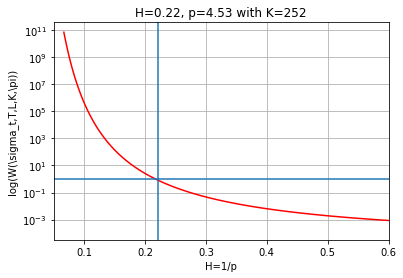

In [169]:
#dal 2016 al 2020 con num e den invertiti
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
#plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))Hurst for SPX at 5 second realized volatility from 2016 to 2022 \n 
plt.title('H=0.22, p=4.53 with K=252')
plt.grid(True)
plt.xlim(0.05,0.6)
plt.axvline(x=1/4.532	, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [138]:
L=90
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W_1(rr2009,len(rr2009),L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,4.367925e-07


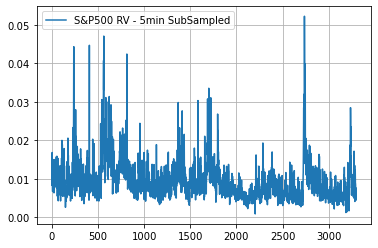

In [125]:
plt.plot(rv,label="S&P500 RV - 5min SubSampled")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [130]:
L=70
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rv,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,0.119834


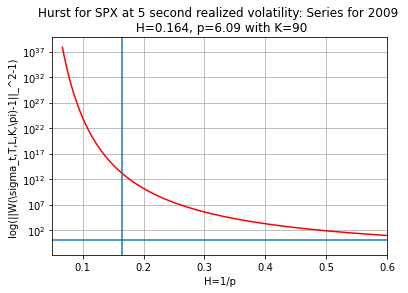

In [131]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(||W(\sigma_t,T,L,K,\pi)-1||_^2-1)')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for SPX at 5 second realized volatility: Series for 2009 \n H=0.164, p=6.09 with K=90')
plt.grid(True)
plt.xlim(0.05,0.6)
plt.axvline(x=1/6.090909, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

cazzate varie
==========================

fai la stessa cosa per diversi indici e annate e poi ci siamo

In [9]:
df = pd.read_excel('oxmanftsemib.xlsx', index_col=0, header=0)
RV=df['rv5_ss']
sq = lambda a: np.sqrt(a)
rv=sq(pd.Series.to_list(RV[0:3298]))
rr16=sq(pd.Series.to_list(RV[1676:2938]))



In [10]:
L=252
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rv,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,0.000174


In [11]:

L=90#len(rv)
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rr2020,L,P[p])-1)**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]


,W()_sigOU
1.0,0.992793


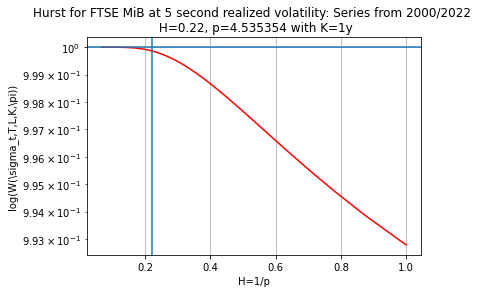

In [12]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for FTSE MiB at 5 second realized volatility: Series from 2000/2022 \n H=0.22, p=4.535354 with K=1y')
plt.grid(True)
#plt.xlim(0.05,0.6)
plt.axvline(x=1/4.535354, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

MICROSOFT
============================

In [13]:
df_MSFT = pd.read_excel('Mid_price_MSFT.xlsx', header=0)
#RV=df['rv5_ss']
sq = lambda a: np.sqrt(a)


In [14]:
msFt=pd.DataFrame.to_numpy(df_MSFT)
msft=msFt.tolist()

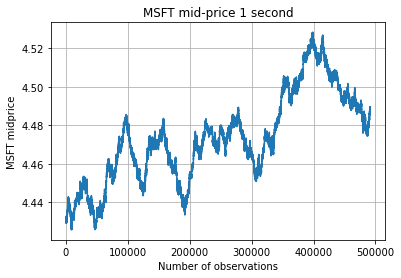

In [176]:
plt.plot(msft)
plt.grid(True)
plt.title("MSFT mid-price 1 second")
plt.xlabel("Number of observations")
plt.ylabel("MSFT midprice")
plt.show()

In [15]:
msft=em.flatten(msft)

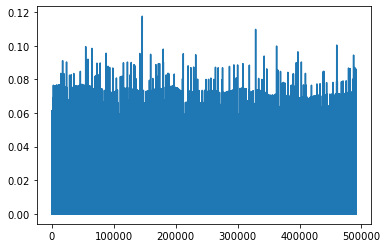

In [296]:
r2=em.calcolaRendimenti(msft,len(msft))
f=em.realVol(r2,1,len(r2)) #real vol a 10 secondi HO rumore di micro1
plt.plot(f)

In [281]:
L=4000#len(rv)
P=np.linspace(1,20,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(f,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]


,W()_sigOU
1.0,0.000001


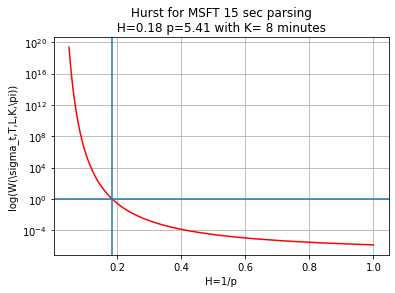

In [282]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for MSFT 15 sec parsing\n H=0.18 p=5.41 with K= 8 minutes ')
plt.grid(True)
#plt.xlim(0.05,0.6)
plt.axvline(x=1/5.414141, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [186]:
L=2000#len(rv) RUMORE
P=np.linspace(1,5,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(f,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,0.000038


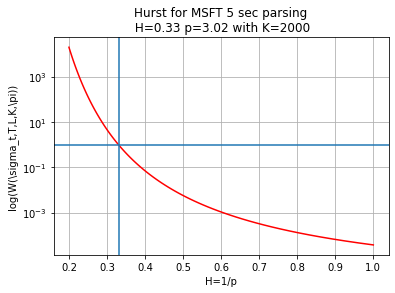

In [188]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for MSFT 5 sec parsing\n H=0.33 p=3.02 with K=2000')
plt.grid(True)
#plt.xlim(0.05,0.6)
plt.axvline(x=1/3.020202, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [20]:
w=em.calcW(f,10,1.25)

c:\Users\macri\Desktop\pro\RoughVolArtOrArtefact\processi_EMGIT.py:315: RuntimeWarning: divide by zero encountered in double_scalars
  w[i]  = den[i]/num[i]#(num[i]/den[i])


In [289]:
def del_Raw(q, x): 
    for i in range(1,len(f)):
        return [np.mean(np.abs(f[i]**2 - f[i-1]**2) ** q)
            for lag in x]

In [327]:
r2=em.calcolaRendimenti(msft,len(msft))
f=em.realVol(r2,3600,len(r2))
sigma=pd.DataFrame(f,index=range(len(f)),columns=['log_sqrt'])

In [306]:
def del_Raw(q, x): 
    return [np.mean(np.abs(sigma['log_sqrt'] - sigma['log_sqrt'].shift(lag)) ** q)
            for lag in x]

[0.11825278187464666, 0.22374912966582433, 0.3198777486755582, 0.4088503555018315, 0.5710698602044623]


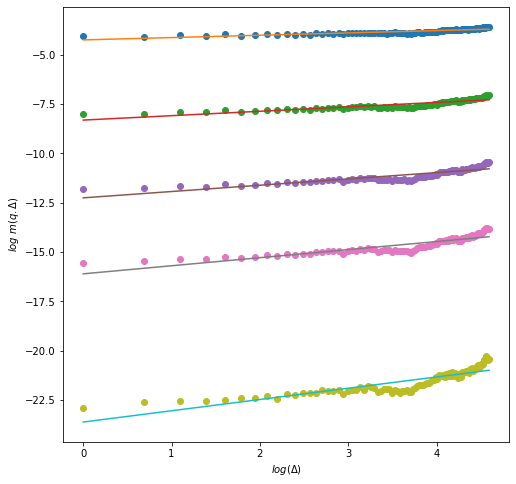

In [328]:
plt.figure(figsize=(8, 8))
plt.xlabel('$log(\Delta)$')
plt.ylabel('$log\  m(q.\Delta)$')
plt.ylim=(-3, -.5)

zeta_q = list()
qVec = np.array([.5, 1, 1.5, 2, 3])
x = np.arange(1, 100)
for q in qVec:
    plt.plot(np.log(x), np.log(del_Raw(q, x)), 'o') 
    model = np.polyfit(np.log(x), np.log(del_Raw(q, x)), 1)
    plt.plot(np.log(x), np.log(x) * model[0] + model[1])
    zeta_q.append(model[0])
    
print(zeta_q)

0.19358426797825762


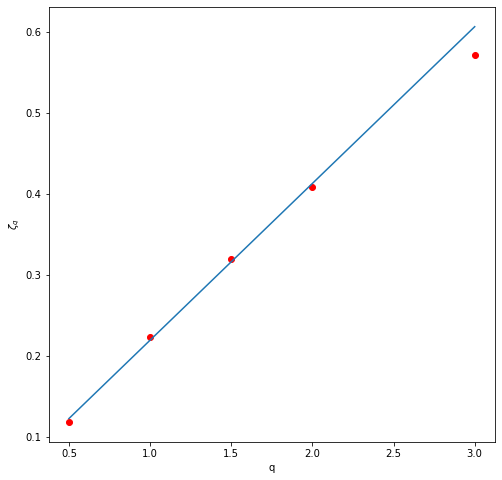

In [329]:
plt.figure(figsize=(8,8))
plt.xlabel('q')
plt.ylabel('$\zeta_{q}$')
plt.plot(qVec, zeta_q, 'or')

line = np.polyfit(qVec[:4], zeta_q[:4],1)
plt.plot(qVec, line[0] * qVec + line[1])
h_est= line[0]
print(h_est)